In [83]:
import pandas as pd
import seaborn as sns

In [84]:
df = pd.read_csv('video_games_sales.csv')

In [85]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [87]:
df.isnull().sum ()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

<Axes: xlabel='Year_of_Release', ylabel='Global_Sales'>

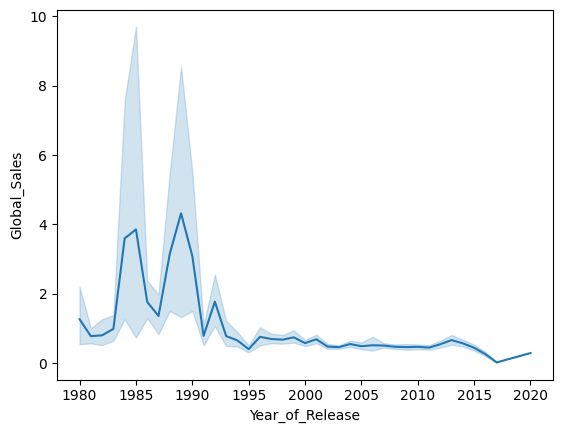

In [88]:
# График мировых продаж по годам. Наибольшие продажи происходили с начала 1980-х годов до начала 1990-х, к концу 2010-х 
# произошел небольшой спад продаж, но в начале 2020-х произошло восстановление.

sns.lineplot(
    x="Year_of_Release", 
    y="Global_Sales",
    data=df)

<Axes: xlabel='Year_of_Release', ylabel='EU_Sales'>

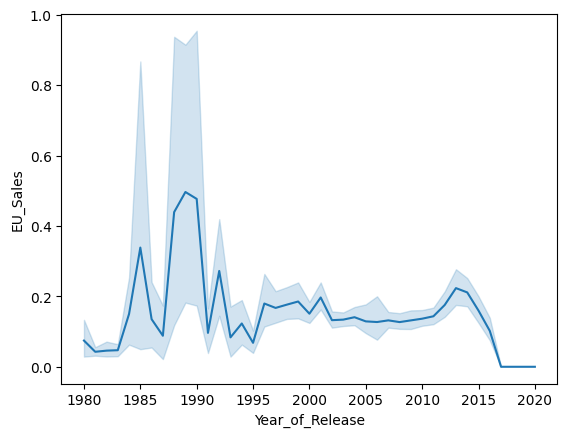

In [89]:
# График европейских продаж по годам. Наибольшие продажи происходили с середины 1980-х годов до начала 1990-х, к концу 2010-х 
# произошел спад продаж, тенденции к восстановлению не последовало.

sns.lineplot(
    x="Year_of_Release", 
    y="EU_Sales",
    data=df)

<Axes: xlabel='Year_of_Release', ylabel='JP_Sales'>

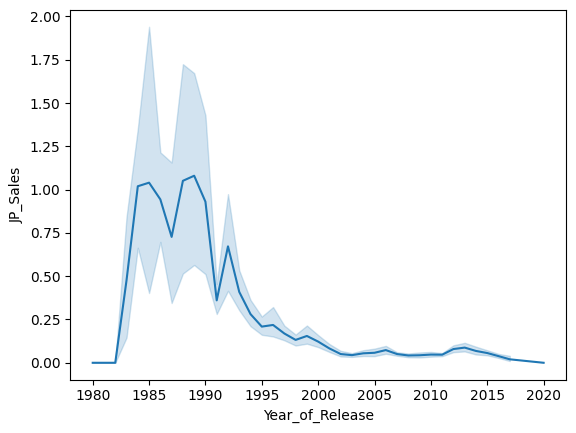

In [90]:
# График продаж в Японии по годам. Наибольшие продажи происходили ближе к середине 1980-х годов. В начале 1990-х произошел
# спад продаж, тенденции к восстановлению не последовало.

sns.lineplot(
    x="Year_of_Release", 
    y="JP_Sales",
    data=df)

<Axes: xlabel='Year_of_Release', ylabel='Critic_Score'>

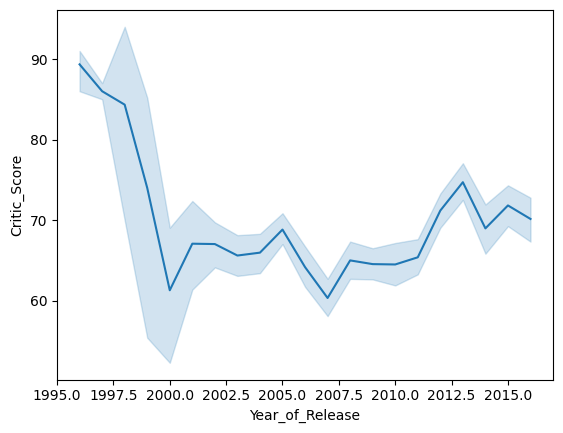

In [91]:
# Оценки критиков по годам жанра Action. Наивысшие оценки были поставлены при оформлении жанра, в середине 1990-х годов. 
# К началу 2000-х годов произошел спад рейтинга, к середине 2010-х наметилась тенденция к росту.

sns.lineplot(
    x="Year_of_Release", 
    y="Critic_Score",
    data=df[df["Genre"] == "Action"])

In [92]:
mylist = df["User_Score"].tolist()


for n, i in enumerate(mylist, 0):
    if i == "tbd":
        i = float('nan')
        mylist[n] = i


df["User_Score"] = mylist

df["User_Score"] = df["User_Score"].astype(float)



In [93]:
df[df["User_Score"] == df["User_Score"]. max ()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14414,Breath of Fire III,PSP,2005.0,Role-Playing,Capcom,0.0,0.02,0.0,0.01,0.03,NaN,NaN,9.7,6.0,Capcom,T


<Axes: xlabel='Year_of_Release', ylabel='User_Score'>

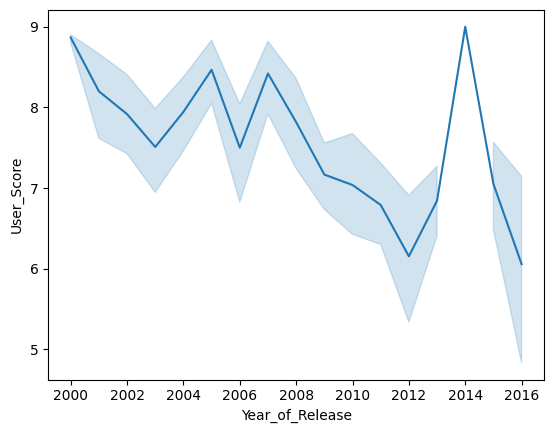

In [95]:
# Оценки пользователей по годам компании Capcom. Высокий рейтинг наблюдался в конце 1990-х годов, после этого происходили
# незначительные колебания рейтинга, в середине 2000-х годов произошел спад, в 2014 году наблюдался самый сильный
# рост рейтинга, после чего снова произошел спад.

sns.lineplot(
    x="Year_of_Release", 
    y="User_Score",
    data=df[df["Publisher"] == "Capcom"])

C:\Users\User\AppData\Local\Temp\ipykernel_18404\2573069595.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90, horizontalalignment='right')


[Text(0, 0, 'Role-Playing'),
 Text(1, 0, 'Action'),
 Text(2, 0, 'Fighting'),
 Text(3, 0, 'Platform'),
 Text(4, 0, 'Strategy'),
 Text(5, 0, 'Adventure'),
 Text(6, 0, 'Racing'),
 Text(7, 0, 'Misc'),
 Text(8, 0, 'Shooter'),
 Text(9, 0, 'Sports'),
 Text(10, 0, 'Simulation'),
 Text(11, 0, 'Puzzle')]

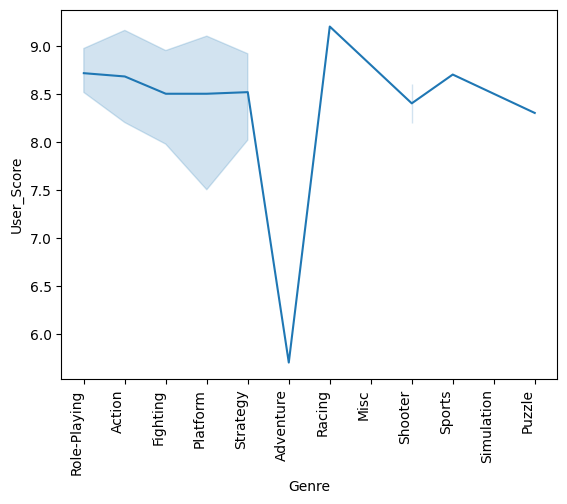

In [96]:
# График популярности жанров по оценкам пользователей в 1998 году. Наиболее популярными жанрами оказались Racing, Sports, 
# Role-Playing и Action, наименее - Adventure.

my_plot = sns.lineplot(
    x="Genre", 
    y="User_Score",
    data=df[df["Year_of_Release"] == 1998])

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90, horizontalalignment='right')


C:\Users\User\AppData\Local\Temp\ipykernel_18404\2665451842.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90, horizontalalignment='right')


[Text(1990.0, 0, '1990'),
 Text(1995.0, 0, '1995'),
 Text(2000.0, 0, '2000'),
 Text(2005.0, 0, '2005'),
 Text(2010.0, 0, '2010'),
 Text(2015.0, 0, '2015'),
 Text(2020.0, 0, '2020')]

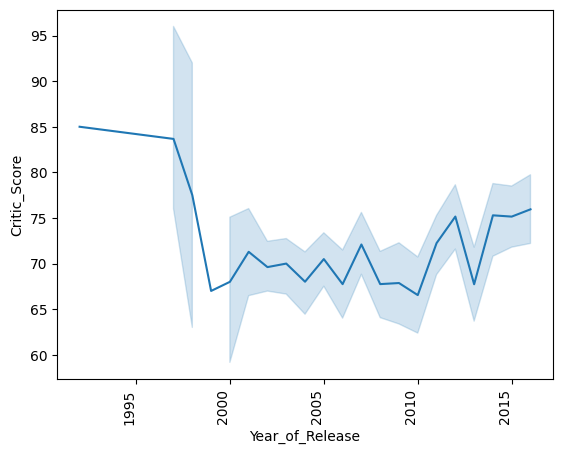

In [97]:
# График популярности жанра Shooter по оценкам критиков за все время. Наивысшие оценки были до конца 1990-х годов, последующие
# рейтинги не поднимались выше среднего уровня, незначительный рост произошел после 2015 года.

my_plot = sns.lineplot(
    x="Year_of_Release", 
    y="Critic_Score",
    data=df[df["Genre"] == "Shooter"])

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90, horizontalalignment='right')

C:\Users\User\AppData\Local\Temp\ipykernel_18404\4290020694.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90, horizontalalignment='right')


[Text(0, 0, 'Sports'),
 Text(1, 0, 'Platform'),
 Text(2, 0, 'Racing'),
 Text(3, 0, 'Role-Playing'),
 Text(4, 0, 'Puzzle'),
 Text(5, 0, 'Misc'),
 Text(6, 0, 'Shooter'),
 Text(7, 0, 'Simulation'),
 Text(8, 0, 'Action'),
 Text(9, 0, 'Fighting'),
 Text(10, 0, 'Adventure'),
 Text(11, 0, 'Strategy')]

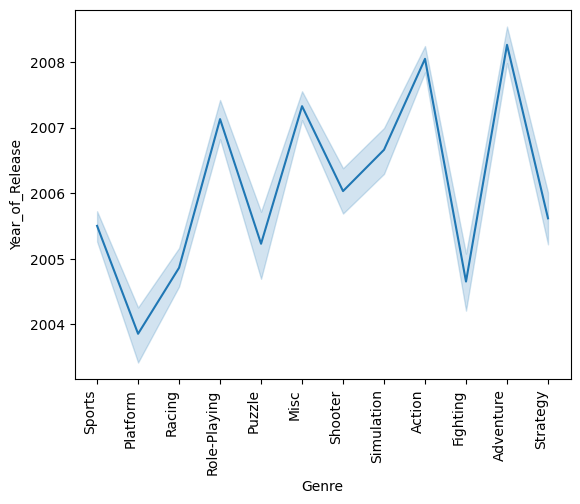

In [98]:
# Упоминание/популярность каждого жанра по годам. В 2008 году наиболее популярными были жанры Action и Adventure,
# в 2006-2007 годах - Role-Playing и Shooter.

my_plot = sns.lineplot(
    x="Genre", 
    y="Year_of_Release",
    data=df)

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90, horizontalalignment='right')

C:\Users\User\AppData\Local\Temp\ipykernel_18404\4056013019.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90, horizontalalignment='right')


[Text(1980.0, 0, '1980'),
 Text(1985.0, 0, '1985'),
 Text(1990.0, 0, '1990'),
 Text(1995.0, 0, '1995'),
 Text(2000.0, 0, '2000'),
 Text(2005.0, 0, '2005'),
 Text(2010.0, 0, '2010'),
 Text(2015.0, 0, '2015'),
 Text(2020.0, 0, '2020')]

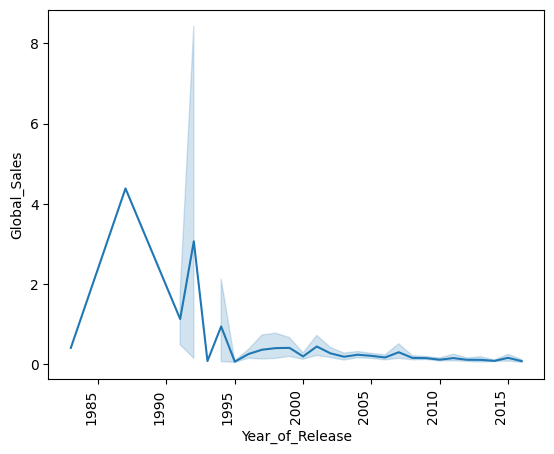

In [99]:
# Мировые продажи игр жанра Adventure по годам. Наиболее активные продажи происходили до начала 1990-х годов.

my_plot = sns.lineplot(
    x="Year_of_Release", 
    y="Global_Sales",
    data=df[df["Genre"] == "Adventure"])

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90, horizontalalignment='right')

C:\Users\User\AppData\Local\Temp\ipykernel_18404\969283459.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90, horizontalalignment='right')


[Text(1975.0, 0, '1975'),
 Text(1980.0, 0, '1980'),
 Text(1985.0, 0, '1985'),
 Text(1990.0, 0, '1990'),
 Text(1995.0, 0, '1995'),
 Text(2000.0, 0, '2000'),
 Text(2005.0, 0, '2005'),
 Text(2010.0, 0, '2010'),
 Text(2015.0, 0, '2015'),
 Text(2020.0, 0, '2020')]

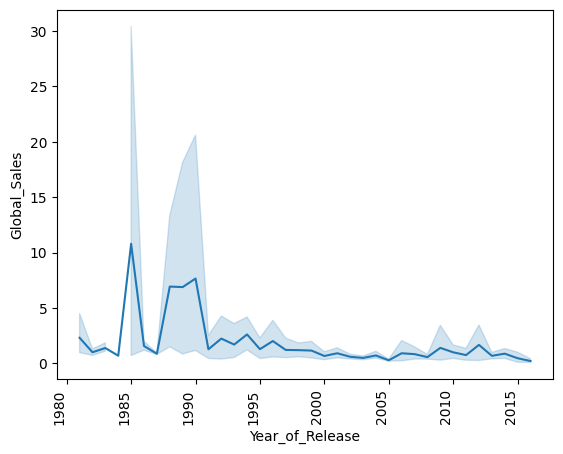

In [100]:
# Мировые продажи игр жанра Platform по годам. Наибольшие продажи происходили с 1985 по 1990 годы. 

my_plot = sns.lineplot(
    x="Year_of_Release", 
    y="Global_Sales",
    data=df[df["Genre"] == "Platform"])

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90, horizontalalignment='right')

In [101]:
df.corr(numeric_only=True)

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.092562,0.003842,-0.168386,0.037700,-0.076433,0.011411,0.223407,-0.267851,0.175339
NA_Sales,-0.092562,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755,0.295413,0.086200,0.246429
EU_Sales,0.003842,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752,0.277533,0.055337,0.283360
JP_Sales,-0.168386,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593,0.180219,0.125598,0.075638
Other_Sales,0.037700,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554,0.251639,0.057119,0.238982
Global_Sales,-0.076433,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471,0.303571,0.088139,0.265012
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.580878,0.264376
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.194133,0.362334
User_Score,-0.267851,0.086200,0.055337,0.125598,0.057119,0.088139,0.580878,0.194133,1.000000,0.027044
User_Count,0.175339,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,0.027044,1.000000


In [102]:
Q1 = df['Global_Sales'].quantile(0.25)

Q3 = df['Global_Sales'].quantile(0.75)

IQR = Q3 - Q1

lower_level = Q1 - 1.5 * IQR

upper_level = Q3 + 1.5 * IQR


mylist = df["Global_Sales"].tolist()

outline = []
for i in mylist:
    if i < lower_level or i > upper_level:
        outline.append(i)

f"lower_level = {lower_level}",f"upper_level = {upper_level}",f"outliners = {outline}"

('lower_level = -0.5549999999999999',
 'upper_level = 1.085',
 'outliners = [82.53, 40.24, 35.52, 32.77, 31.37, 30.26, 29.8, 28.92, 28.32, 28.31, 24.67, 23.21, 23.1, 22.7, 21.81, 21.79, 21.04, 20.81, 20.61, 20.15, 18.25, 18.14, 17.28, 16.27, 16.15, 15.85, 15.29, 15.14, 14.98, 14.73, 14.64, 14.63, 14.61, 14.6, 13.79, 13.67, 13.47, 13.32, 13.1, 12.84, 12.66, 12.63, 12.61, 12.13, 12.12, 11.89, 11.77, 11.68, 11.66, 11.35, 11.18, 11.01, 10.95, 10.81, 10.7, 10.6, 10.55, 10.5, 10.49, 10.3, 10.25, 10.12, 9.9, 9.87, 9.86, 9.72, 9.71, 9.49, 9.44, 9.36, 9.31, 9.3, 9.18, 9.16, 8.91, 8.79, 8.76, 8.57, 8.49, 8.38, 8.27, 8.16, 8.09, 8.07, 8.05, 8.01, 7.99, 7.98, 7.86, 7.81, 7.72, 7.69, 7.66, 7.6, 7.59, 7.58, 7.55, 7.51, 7.46, 7.39, 7.38, 7.32, 7.2, 7.2, 7.17, 7.16, 7.16, 7.15, 7.14, 7.13, 7.09, 7.07, 6.95, 6.9, 6.83, 6.82, 6.76, 6.75, 6.74, 6.71, 6.68, 6.66, 6.65, 6.62, 6.51, 6.49, 6.47, 6.45, 6.44, 6.43, 6.41, 6.41, 6.4, 6.39, 6.34, 6.32, 6.31, 6.3, 6.29, 6.27, 6.21, 6.19, 6.09, 6.08, 6.05, 6.03, 6.